In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [7]:
glass = pd.read_csv('../input/glass/glass.csv')

In [8]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


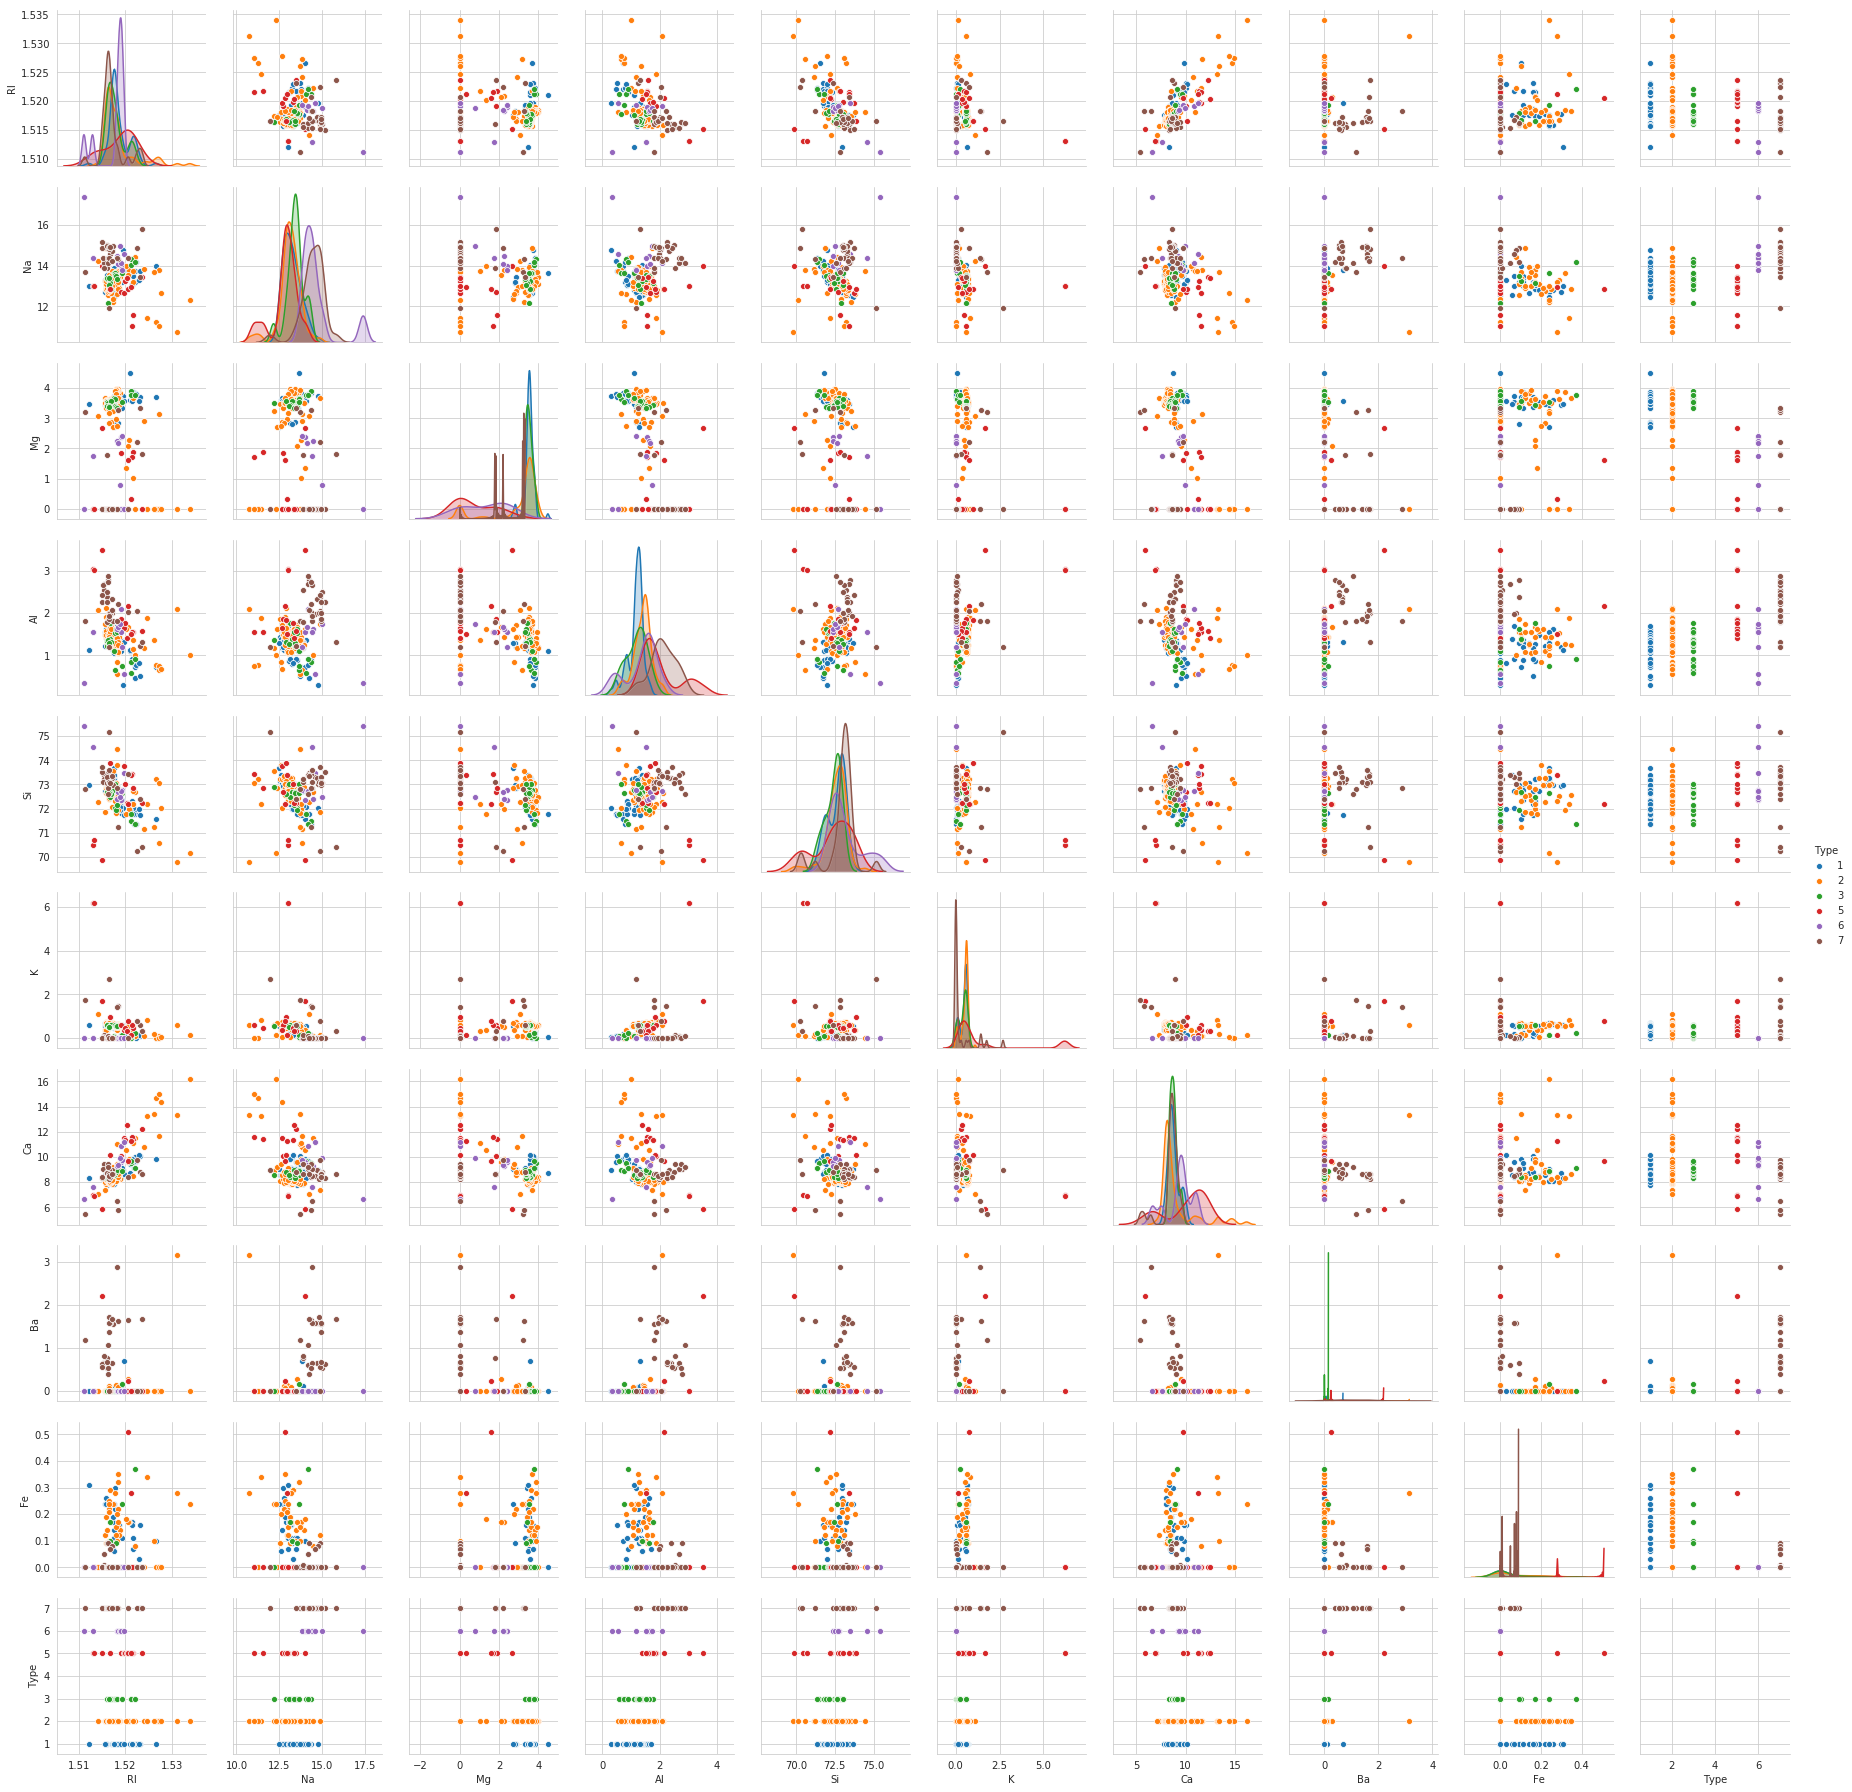

In [10]:
sns.pairplot(glass,hue='Type')

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(glass.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
scaled_features = scaler.transform(glass.drop('Type',axis=1))

In [16]:
scaled_df = pd.DataFrame(data=scaled_features,columns=glass.columns[:-1])
scaled_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_df,glass['Type'],test_size=0.33)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
error_rate = []
for i in range(1,50):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    pred_i = kn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))

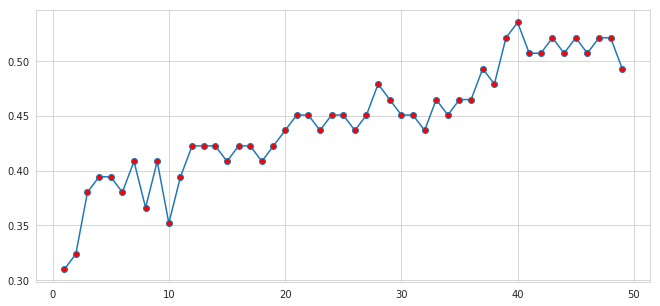

In [34]:
plt.figure(figsize=(11,5))
plt.plot(range(1,50),error_rate,marker='o',markerfacecolor='red')

In [35]:
# It seems the best n_neighbors to use is either 1 or 2. As it goes higher, the number of errors raise too.

In [36]:
kn = KNeighborsClassifier(n_neighbors=2)

In [37]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [38]:
pred = kn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))